   Gender  Age Range  size    wt
0       1          1  4512  1530
1       1          1  3738  1297
2       1          1  4261  1335
3       1          1  3777  1282
4       1          1  4177  1590
5       1          1  3585  1300
6       1          1  3785  1400
7       1          1  3559  1255
8       1          1  3613  1355
9       1          1  3982  1375
0.2634293394893993 325.5734210494428
Goodness of fit or Least Squared error is 0.639311719957
0.2634293394893993


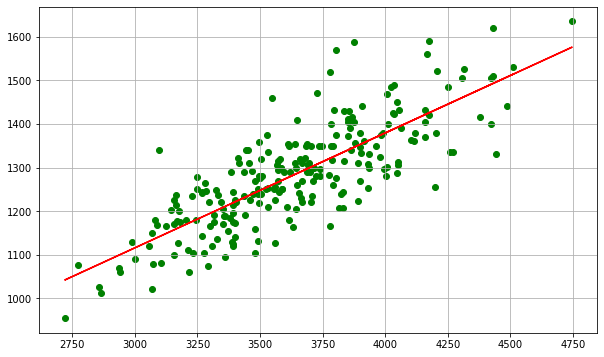

,X,Y,x-x',y-y',(x-x')^2,(x-x')(y-y'),Actual Y,Predct Y
0,4512,1530,878.008439,247.126582,770898.818637,216979.224697,1530,1514.166601
1,3738,1297,104.008439,14.126582,10817.755345,1469.283769,1297,1310.272292
2,4261,1335,627.008439,52.126582,393139.582350,32683.806975,1335,1448.045837
3,3777,1282,143.008439,-0.873418,20451.413573,-124.906105,1282,1320.546036
4,4177,1590,543.008439,307.126582,294858.164628,166772.325963,1590,1425.917772
...,...,...,...,...,...,...,...,...
232,3214,1110,-419.991561,-172.873418,176392.911464,72605.376596,1110,1172.235318
233,3394,1215,-239.991561,-67.873418,57595.949438,16289.047482,1215,1219.652599
234,3233,1104,-400.991561,-178.873418,160794.232139,71726.731026,1104,1177.240476
235,3352,1170,-281.991561,-112.873418,79519.240578,31829.351279,1170,1208.588567


In [12]:
import matplotlib.pyplot as pl
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import random
from math import sin

def plot(a,b,a_m,b_m,c,m):
    print(m)
    y=m*a+c
    pl.figure(figsize=(10,6))
    pl.scatter(a,b,color="g")
    pl.grid()
#     pl.plot([0,a_m,8],[b_m,b_m,b_m],color="r")
#     pl.plot([a_m,a_m,a_m],[0,b_m,8],color="r")
    pl.plot(a,y,color="r")

#     pl.scatter(a,y,color="g")
    pl.plot()
    pl.show()
    
    
olddf=pd.read_csv("headbrain.csv")
newdf=olddf.rename(columns={"Head Size(cm^3)":"size",
                            "Brain Weight(grams)":"wt"})
newdf.to_csv("brain.csv")

a=newdf["size"].values
b=newdf["wt"].values
# a=np.array([0,1,2,3,6,3,2,7,8,4])
# b=np.array([1,6,3,5,7,2,1,6,8,1])

# a=np.array([1,2,3,4,5])
# b=np.array([3,4,2,4,5])

# a=np.array([random.randint(1,100) for i in range(1,1000)])
# b=np.array([random.randint(1,100) for i in range(1,1000)])

print(newdf.head(10))

a_m=a.mean()
b_m=b.mean()
x_x=np.subtract(a,a_m)
y_y=np.subtract(b,b_m)
m=np.sum(np.multiply(x_x,y_y))/np.sum(np.square(x_x))
c=b_m-m*a_m

df=pd.DataFrame({"X":a,
                 "Y":b,
                 "x-x'":x_x,
                 "y-y'":y_y,
                 "(x-x')^2":np.square(x_x),
                 "(x-x')(y-y')":np.multiply(x_x,y_y),
                 "Actual Y":b,
                 "Predct Y":m*a+c})

error=(np.sum(np.square(np.subtract(m*a+c,b_m))))/np.sum(np.square(np.subtract(b,b_m)))
print(m,c)
print("Goodness of fit or Least Squared error is",error)
plot(a,b,a_m,b_m,c,m)
df